In [5]:
import pandas as pd

In [6]:
pd1 = pd.read_csv('2024-07-23-washington-post-police-shootings-export.csv')

In [7]:
pd1

,date,name,age,gender,armed,race,city,state,flee,body_camera,signs_of_mental_illness,police_departments_involved
0,2015-01-02,Lewis Lee Lembke,47.0,male,gun,White,Aloha,OR,not,False,False,"Washington County Sheriff's Office, OR"
1,2015-01-02,Tim Elliot,53.0,male,gun,Asian,Shelton,WA,not,False,True,"Mason County Sheriff's Office, WA"
2,2015-01-03,John Paul Quintero,23.0,male,unarmed,Hispanic,Wichita,KS,not,False,False,"Wichita Police Department, KS"
3,2015-01-04,Kenneth Joe Brown,18.0,male,gun,White,Guthrie,OK,not,False,False,"Oklahoma Highway Patrol, OK"
4,2015-01-04,Michael Rodriguez,39.0,male,other,Hispanic,Evans,CO,not,False,False,"Evans Police Department, CO"
...,...,...,...,...,...,...,...,...,...,...,...,...
9888,2024-07-13,Daniel Scott McGoldrick,35.0,male,gun,Unknown,Easley,SC,not,False,False,"Easley Police Department, SC"
9889,2024-07-15,NaN,NaN,male,undetermined,Unknown,Graham,WA,other,False,False,"Pierce County Sheriff's Department, WA"
9890,2024-07-15,Steven Kissack,35.0,male,knife,White,Juneau,AK,foot,False,False,"Alaska Wildlife Troopers, AK;Juneau Police Dep..."
9891,2024-07-15,Charles Patrick Carroll,68.0,male,replica,White,Beaumont,TX,not,False,True,"Beaumont Police Department, TX"


In [16]:
# How many rows and columns are in the dataset?
# 9893 rows × 12 columns
# What are the column names, and what data types do they have?
# date	name	age	gender	armed	race	city	state	flee	body_camera	signs_of_mental_illness	police_departments_involved
# Missing Data:

# Are there any missing values in the dataset? If so, which columns have the most missing data


In [8]:
#Display number of rows and column
pd_shape = pd1.shape
pd_shape

(9893, 12)

In [9]:
# Dispaly column names and data type
pd_info = pd1.dtypes
pd_info
# missing values


date                            object
name                            object
age                            float64
gender                          object
armed                           object
race                            object
city                            object
state                           object
flee                            object
body_camera                       bool
signs_of_mental_illness           bool
police_departments_involved     object
dtype: object

In [45]:
mising_data= pd1.isnull().sum()
mising_data

date                              0
name                            337
age                             384
gender                           28
armed                           211
race                              0
city                             72
state                             0
flee                           1345
body_camera                       0
signs_of_mental_illness           0
police_departments_involved       1
dtype: int64

In [48]:
# Sort the columns by the most missing data
mising_data_sorted = mising_data[mising_data>0].sort_values(ascending=False)
mising_data_sorted

flee                           1345
age                             384
name                            337
armed                           211
city                             72
gender                           28
police_departments_involved       1
dtype: int64

In [50]:
# What is the mean, median, and standard deviation of any numeric columns (like ages or years)?
numeric_summary = pd1.describe()
numeric_summary

,age
count,9509.000000
mean,37.409507
std,12.932616
min,2.000000
25%,28.000000
50%,35.000000
75%,45.000000
max,92.000000


<BarContainer object of 12 artists>

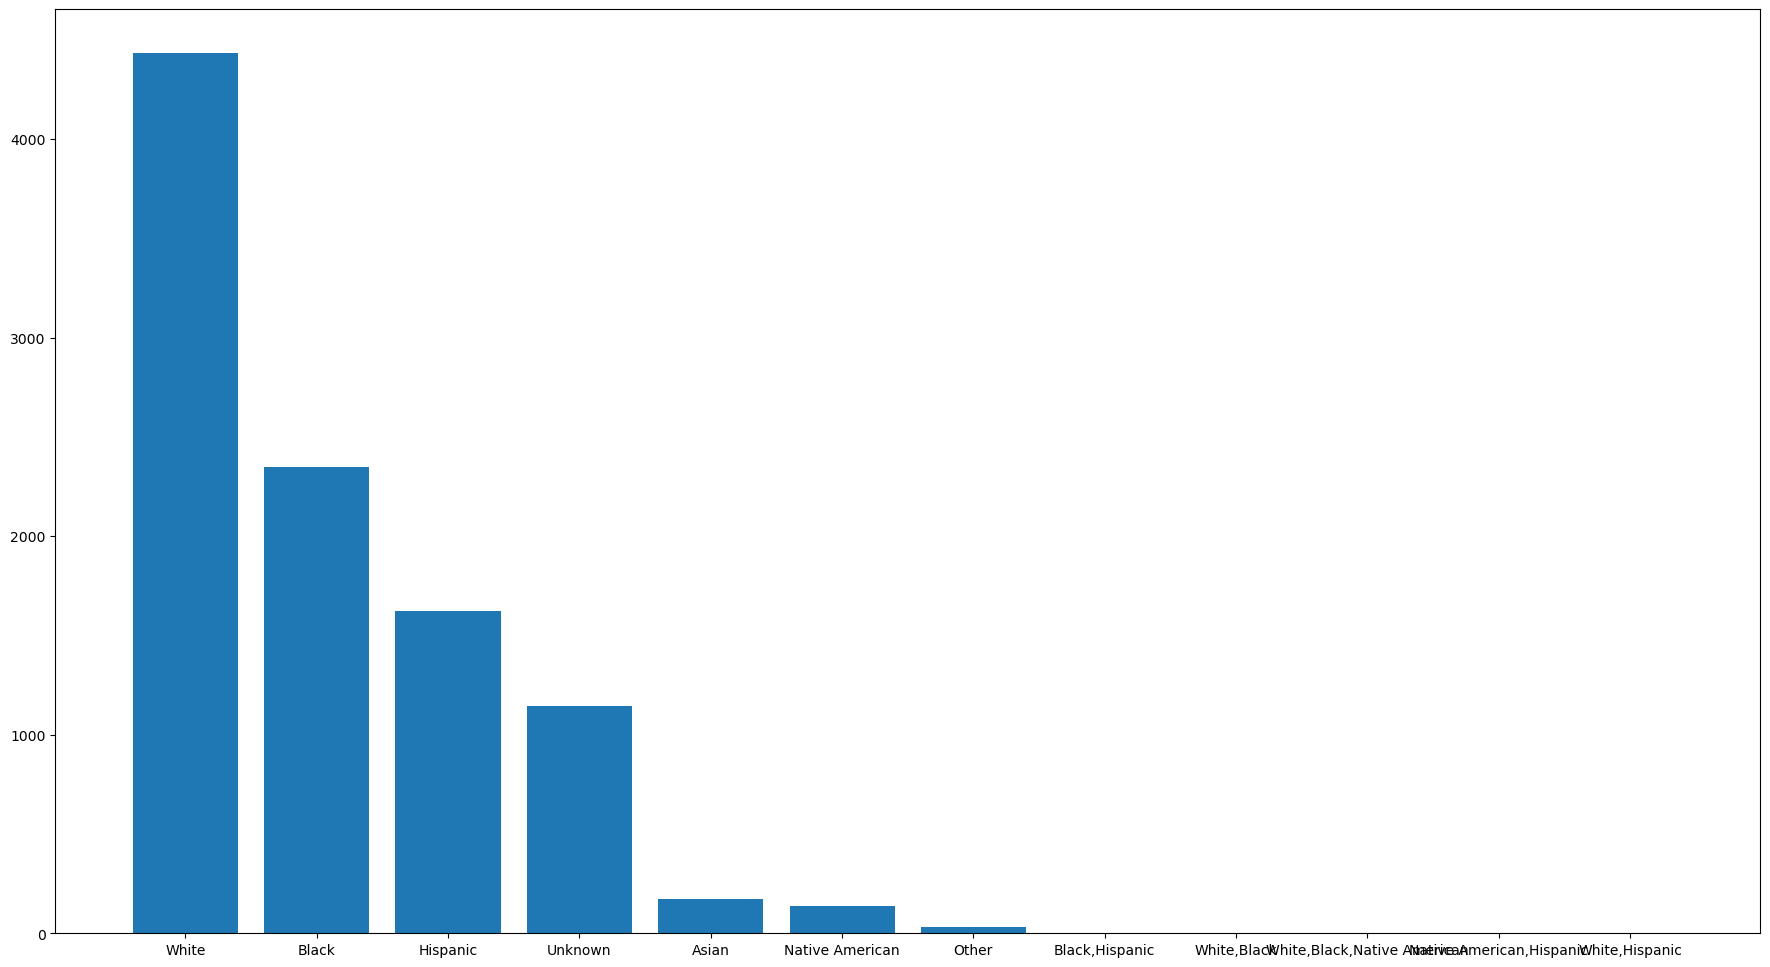

In [57]:
# Whaat is the most common race of the people involved in the police shooting?
# mostcommon race
most_common_race=pd1['race'].value_counts().idxmax()
race_counts=pd1['race'].value_counts()
most_common_race,race_counts

# Create a bar chart for race count
plt.figure(figsize=(22,12))
plt.bar(race_counts.index,race_counts.values)

In [16]:
# count for gender
pd1['gender'].value_counts()
# Race and gender analysis
# what is the braekdown of incidents by race and gender
race_gender_breakdown = pd1.groupby(['race', 'gender']).size()
race_gender_breakdown
# plot chart


NameError: name 'plt' is not defined

In [17]:
# Location based analysis
# what state has the highest number of shooting
state_counts = pd1['state'].value_counts()
state_counts

state
CA    1357
TX     944
FL     635
AZ     440
GA     369
CO     355
NC     296
OH     284
TN     276
WA     267
OK     256
MO     248
PA     215
NM     207
IL     201
IN     198
LA     191
AL     189
NY     187
VA     180
MI     178
KY     170
NV     163
SC     163
WI     158
OR     158
AR     136
MS     132
UT     125
MD     124
MN     105
NJ     104
WV      96
KS      95
ID      85
AK      66
MT      63
MA      60
IA      59
NE      47
ME      46
HI      45
WY      33
SD      32
CT      31
NH      31
DC      29
DE      21
ND      20
VT      15
RI       8
Name: count, dtype: int64

In [41]:
# Time based Analysis
# Ensure the 'date' column is in datetime format
pd1['date'] = pd.to_datetime(pd1['date'], errors='coerce')
pd1['date']
# which month do most police shooting occur
incidence_per_month = pd1['date'].dt.month.value_counts()
incidence_per_month
#What is the most common race of the people involved in the police shootings?
most_common_race = pd1['race'].value_counts().idxmax()
race_counts = pd1['race'].value_counts()
most_common_race, race_counts
# How many incidents occurred each year?
incidents_per_year = pd1['date'].dt.year.value_counts()
incidents_per_year
# Assuming there's a 'weapon' or similar column
weapon_involvement = pd1['armed'].value_counts(normalize=True)
weapon_involvement
# normalize=True: This option returns the relative frequencies (or proportions) instead of the absolute counts. 
# Instead of showing how many times each value appears, it shows what percentage of the total rows that value represents.

armed
gun                          0.593679
knife                        0.173828
unarmed                      0.056910
undetermined                 0.043483
vehicle                      0.036253
replica                      0.032431
blunt_object                 0.024685
unknown                      0.015286
other                        0.010122
gun,knife                    0.004131
gun,vehicle                  0.003925
vehicle,gun                  0.002066
knife,knife                  0.000516
knife,blunt_object           0.000413
other,gun                    0.000413
blunt_object,blunt_object    0.000310
blunt_object,knife           0.000310
knife,vehicle                0.000310
vehicle,knife                0.000207
replica,vehicle              0.000103
vehicle,knife,other          0.000103
replica,knife                0.000103
other,blunt_object,knife     0.000103
other,knife                  0.000103
gun,other                    0.000103
blunt_object,other           0.000103
Name: 